In [152]:
%load_ext autoreload
%autoreload 1
%aimport pygenesig.pybioqc
%aimport pygenesig.tools
%aimport pygenesig.file_formats
%matplotlib inline


from pygenesig.pybioqc import * 
from pygenesig.bioqc import * 
from pygenesig.tools import * 
from pygenesig.file_formats import * 
from scipy.stats import mannwhitneyu
import pandas as pd
from pylab import * 
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [153]:
exprs = read_expr("../pygenesig-example/data_processed/v6/exprs.npy")
target = read_target("../pygenesig-example/data_processed/v6/target.csv")
rosetta = read_rosetta("../pygenesig-example/data_processed/v6/rosetta.csv", inverse=True)

In [207]:
signatures = load_gmt("../pygenesig-example/results/gtex_v6_gini_0.8_3/signatures.gmt")
signatures_ind = translate_signatures(signatures, rosetta, ignore_missing=True)
signatures_ind = {
    tissue: np.array(inds) for tissue, inds in signatures_ind.items()
}

In [208]:
target

array(['Adipose_Subcutaneous', 'Adipose_Subcutaneous',
       'Adipose_Subcutaneous', ..., 'Whole_Blood', 'Whole_Blood',
       'Whole_Blood'], 
      dtype='<U37')

In [209]:
signatures.keys()

dict_keys(['Brain_Putamen_basal_ganglia', 'Brain_Nucleus_accumbens_basal_ganglia', 'Brain_Cerebellar_Hemisphere', 'Prostate', 'Brain_Amygdala', 'Esophagus_Muscularis', 'Pancreas', 'Brain_Cerebellum', 'Brain_Cortex', 'Colon_Transverse', 'Brain_Hypothalamus', 'Brain_Hippocampus', 'Minor_Salivary_Gland', 'Thyroid', 'Spleen', 'Heart_Atrial_Appendage', 'Breast_Mammary_Tissue', 'Esophagus_Mucosa', 'Testis', 'Adipose_Visceral_Omentum', 'Skin_Sun_Exposed_Lower_leg', 'Nerve_Tibial', 'Liver', 'Stomach', 'Cells_EBV-transformed_lymphocytes', 'Cells_Transformed_fibroblasts', 'Ovary', 'Artery_Aorta', 'Kidney_Cortex', 'Bladder', 'Artery_Tibial', 'Muscle_Skeletal', 'Adipose_Subcutaneous', 'Whole_Blood', 'Adrenal_Gland', 'Artery_Coronary', 'Small_Intestine_Terminal_Ileum', 'Vagina', 'Heart_Left_Ventricle', 'Lung', 'Brain_Substantia_nigra', 'Colon_Sigmoid', 'Brain_Caudate_basal_ganglia', 'Esophagus_Gastroesophageal_Junction', 'Skin_Not_Sun_Exposed_Suprapubic', 'Pituitary', 'Brain_Anterior_cingulate_cort

In [259]:
target_name = {
    'tissue1': 'Testis',
    'tissue2': 'Liver'
}

In [260]:
sig_name = {
    'tissue1': 'Testis',
    'tissue2': 'Liver'
}

In [261]:
np.where(target == target_name['tissue1'])

(array([7488, 7489, 7490, 7491, 7492, 7493, 7494, 7495, 7496, 7497, 7498,
        7499, 7500, 7501, 7502, 7503, 7504, 7505, 7506, 7507, 7508, 7509,
        7510, 7511, 7512, 7513, 7514, 7515, 7516, 7517, 7518, 7519, 7520,
        7521, 7522, 7523, 7524, 7525, 7526, 7527, 7528, 7529, 7530, 7531,
        7532, 7533, 7534, 7535, 7536, 7537, 7538, 7539, 7540, 7541, 7542,
        7543, 7544, 7545, 7546, 7547, 7548, 7549, 7550, 7551, 7552, 7553,
        7554, 7555, 7556, 7557, 7558, 7559, 7560, 7561, 7562, 7563, 7564,
        7565, 7566, 7567, 7568, 7569, 7570, 7571, 7572, 7573, 7574, 7575,
        7576, 7577, 7578, 7579, 7580, 7581, 7582, 7583, 7584, 7585, 7586,
        7587, 7588, 7589, 7590, 7591, 7592, 7593, 7594, 7595, 7596, 7597,
        7598, 7599, 7600, 7601, 7602, 7603, 7604, 7605, 7606, 7607, 7608,
        7609, 7610, 7611, 7612, 7613, 7614, 7615, 7616, 7617, 7618, 7619,
        7620, 7621, 7622, 7623, 7624, 7625, 7626, 7627, 7628, 7629, 7630,
        7631, 7632, 7633, 7634, 7635, 

In [262]:
np.where(target == target_name['tissue2'])

(array([4789, 4790, 4791, 4792, 4793, 4794, 4795, 4796, 4797, 4798, 4799,
        4800, 4801, 4802, 4803, 4804, 4805, 4806, 4807, 4808, 4809, 4810,
        4811, 4812, 4813, 4814, 4815, 4816, 4817, 4818, 4819, 4820, 4821,
        4822, 4823, 4824, 4825, 4826, 4827, 4828, 4829, 4830, 4831, 4832,
        4833, 4834, 4835, 4836, 4837, 4838, 4839, 4840, 4841, 4842, 4843,
        4844, 4845, 4846, 4847, 4848, 4849, 4850, 4851, 4852, 4853, 4854,
        4855, 4856, 4857, 4858, 4859, 4860, 4861, 4862, 4863, 4864, 4865,
        4866, 4867, 4868, 4869, 4870, 4871, 4872, 4873, 4874, 4875, 4876,
        4877, 4878, 4879, 4880, 4881, 4882, 4883, 4884, 4885, 4886, 4887,
        4888, 4889, 4890, 4891, 4892, 4893, 4894, 4895, 4896, 4897, 4898,
        4899, 4900, 4901, 4902, 4903, 4904, 4905, 4906, 4907]),)

In [263]:
s_ind = {
    'tissue1': np.flatnonzero(target == target_name['tissue1'])[0],
    'tissue2': np.flatnonzero(target == target_name['tissue2'])[0]
}
s_ind

{'tissue1': 7488, 'tissue2': 4789}

In [264]:
s = {
    tissue: exprs[:, i] for tissue, i in s_ind.items()
}

In [265]:
ind = {
    tissue: np.array([True if i in signatures_ind[name] else False for i in range(exprs.shape[0])])
    for tissue, name in sig_name.items()
}

In [266]:
rel_rk = {
    tissue: pd.DataFrame(exprs[:, target == target_name[tissue]]).rank(
        axis=0, ascending=False).iloc[ind[tissue], :].median(axis=0).median() / exprs.shape[0] for tissue in s
}
rel_rk

{'tissue1': 0.10731257425123492, 'tissue2': 0.017460764084286876}

In [267]:
size = {
    tissue: sum(t_ind) for tissue, t_ind in ind.items()
}
size

{'tissue1': 859, 'tissue2': 286}

In [268]:
overlap = jaccard_ind(*(signatures_ind[sig_name[tissue]] for tissue in s))
overlap

0.010591350397175641

In [269]:
def mix(x, y, prop_x):
    return x * prop_x + y * (1 - prop_x)

In [270]:
def wmw_r_corr(x, y, u, u_exp):
    return 1 - (2 * (u - u_exp)) / (x.size * y.size)

In [271]:
mixed = [mix(s['tissue1'], s['tissue2'], f) for f in np.arange(0, 1.01, 0.01)]

In [272]:
wmw_res = {
    tissue:  [mannwhitneyu(s_mixed[~ind[tissue]], s_mixed[ind[tissue]]) for s_mixed in mixed] for 
    tissue in ind
}
wmw_res

{'tissue1': [MannwhitneyuResult(statistic=9755750.5, pvalue=4.374766168135712e-45),
  MannwhitneyuResult(statistic=11110445.5, pvalue=7.2358540050795673e-18),
  MannwhitneyuResult(statistic=10086406.5, pvalue=1.3173215545775286e-35),
  MannwhitneyuResult(statistic=9429959.5, pvalue=2.2590042198538706e-50),
  MannwhitneyuResult(statistic=8941036.5, pvalue=4.2589274950723579e-63),
  MannwhitneyuResult(statistic=8551702.5, pvalue=2.7604165874356763e-74),
  MannwhitneyuResult(statistic=8226583.5, pvalue=2.4016539464407608e-84),
  MannwhitneyuResult(statistic=7946356.5, pvalue=1.5311122905420965e-93),
  MannwhitneyuResult(statistic=7701056.5, pvalue=5.4596883594922443e-102),
  MannwhitneyuResult(statistic=7483266.5, pvalue=8.412895669448568e-110),
  MannwhitneyuResult(statistic=7287112.5, pvalue=4.3426894223027117e-117),
  MannwhitneyuResult(statistic=7108993.5, pvalue=6.5226818302298409e-124),
  MannwhitneyuResult(statistic=6945693.5, pvalue=2.4341500666580825e-130),
  MannwhitneyuResult(s

In [273]:
wmw_exp = {}
for tissue in ind:
    y = np.repeat(np.percentile(s[tissue], (1- rel_rk[tissue]) * 100), size[tissue])
    u, p = mannwhitneyu(s[tissue], y)
    wmw_exp[tissue] = (wmw_r(s[tissue], y, u), u, p) 
wmw_exp

{'tissue1': (0.78534358781967106, 2948947.0, 0.0),
 'tissue2': (0.96504720815356715, 159874.0, 2.6432426401328698e-187)}

In [274]:
u_exp = {
    tissue: wmw_u_exp(rel_rk[tissue], size[tissue], s[tissue].size) for tissue in ind
}
u_exp

{'tissue1': 2579147.5, 'tissue2': 118690.0}

## BioQC score, corrected and uncorrected

In [275]:
wmw_score_corr = {
    tissue: [-np.log10(p) / -np.log10(wmw_exp[tissue][2]) for u, p in res] for tissue, res in wmw_res.items()
}
wmw_score = {
    tissue: [-np.log10(p) for u, p in res] for tissue, res in wmw_res.items()
}

/pstore/apps/Anaconda3/4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/pstore/apps/Anaconda3/4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/pstore/apps/Anaconda3/4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10


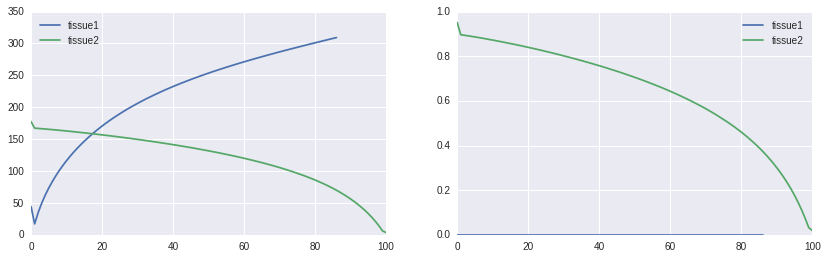

In [276]:
fix, (ax1, ax2) = subplots(1, 2, figsize=(14, 4))
pd.DataFrame(wmw_score).plot(ax=ax1)
pd.DataFrame(wmw_score_corr).plot(ax=ax2)

## $r$ effect size, corrected and uncorrected

In [277]:
r = {
    tissue: [wmw_r(s_mixed[~ind[tissue]], s_mixed[ind[tissue]], u) for u, p in res]
    for s_mixed, (tissue, res) in zip(mixed, wmw_res.items())
}
r_corr = {
    tissue: [wmw_r(s_mixed[~ind[tissue]], s_mixed[ind[tissue]], u) / wmw_exp[tissue][0] for u, p in res]
    for s_mixed, (tissue, res) in zip(mixed, wmw_res.items())
}
r_corr_u = {
    tissue: [wmw_r_corr(s_mixed[~ind[tissue]], s_mixed[ind[tissue]], u, u_exp[tissue]) for u, p in res]
    for s_mixed, (tissue, res) in zip(mixed, wmw_res.items())
}

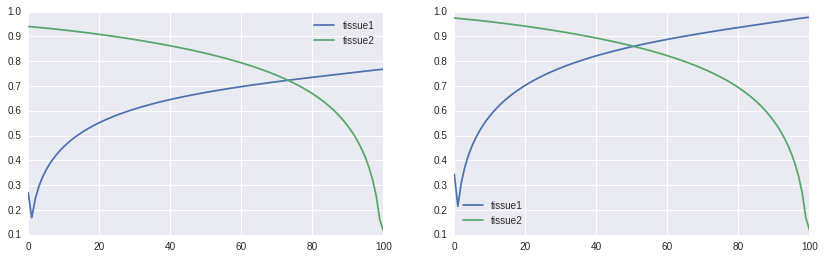

In [278]:
fix, (ax1, ax2) = subplots(1, 2, figsize=(14, 4))
pd.DataFrame(r).plot(ax=ax1)
pd.DataFrame(r_corr).plot(ax=ax2)

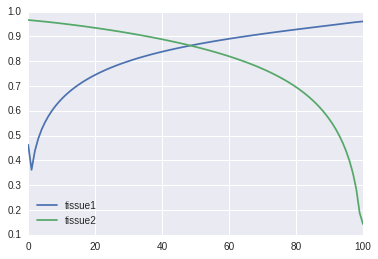

In [279]:
pd.DataFrame(r_corr_u).plot()

In [127]:
d = stats.gaussian_kde([x for x in mixed[-1] if 0 <= x <= 70])

In [128]:
xs = np.linspace(0, 20, 500)

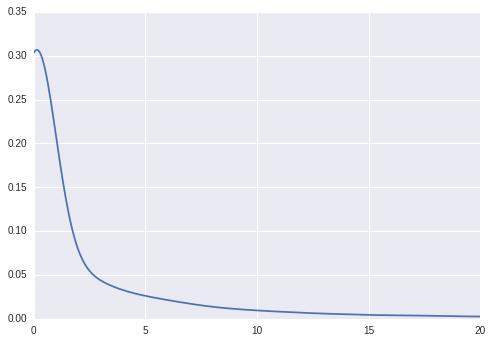

In [129]:
plot(xs, d(xs))

In [130]:
densities = {
    tissue: [d(np.median(mixed_s[ind[tissue]]))[0] for mixed_s in mixed] for tissue in s
}

In [131]:
r_density = {
    tissue: [r / d for r, d in zip(r_corr_u[tissue], densities[tissue])] for tissue in s
}

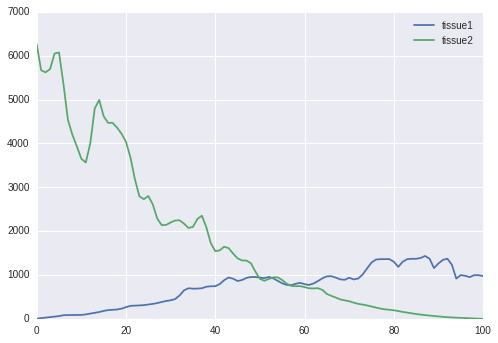

In [132]:
pd.DataFrame(r_density).plot()